<a href="https://colab.research.google.com/github/remre/ChineseMnist-and-Own-HndwrittenGuess/blob/main/mnistownhandwritingOpencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
eight = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/eight.png')
three = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/three.png')
four = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/four.png')
five = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/five.png')
six = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/six.png')
seven = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/seven.png')
nine = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/nine.png')
one = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/one.png')
two = cv2.imread('/content/drive/MyDrive/dataAI/mnisthandwritten/two.png')


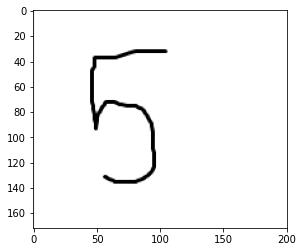

In [3]:
plt.imshow(five)

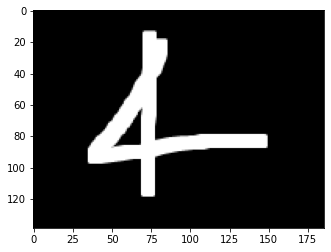

In [4]:
fourone = four.copy()
kernel = np.ones((7,7))
fourone = cv2.bitwise_not(fourone)
fourone = cv2.cvtColor(fourone, cv2.COLOR_BGR2RGB)
closing = cv2.morphologyEx(fourone,cv2.MORPH_DILATE,kernel,)
plt.imshow(closing)

In [5]:
def mnist(img):
    img1 = img.copy()
    #_, img = cv2.threshold(img, 150, 255, cv2.THRESH_TRUNC)
    img1 = cv2.bitwise_not(img1)
    
    kernel = np.ones((7,7), np.uint8)
    img1  = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
    img1  = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
    img1 = cv2.dilate(img1, kernel) # two thicken the hand writing
    #closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel,)
    #_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    
    #img = cv2.GaussianBlur(img, (5,5),0) # no need it i guess
    closing = cv2.morphologyEx(img1,cv2.MORPH_CLOSE,kernel,)
    img1 = cv2.resize(closing, (28, 28), interpolation=cv2.INTER_LINEAR) # the size of mnist is 28x28
    
    return img1

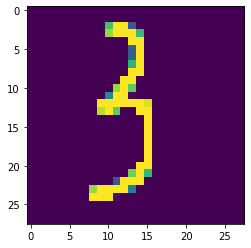

In [6]:
plt.imshow(mnist(three))

In [7]:
mnist(three).shape

(28, 28)

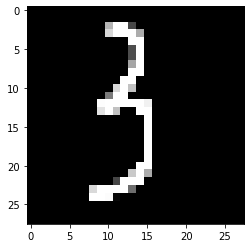

In [8]:
threeone = three.copy()
img = cv2.bitwise_not(threeone)

#img  = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#img = cv2.GaussianBlur(img, (5,5),0)
img = cv2.dilate(img, kernel)
img = cv2.resize(img, (28, 28))
plt.imshow(img)

In [9]:
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd


import torch
from torch import nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F

from torchvision import datasets, transforms
from torch.utils.data import  DataLoader


In [10]:
from torchsummary import summary

In [11]:
# Define a transform to normalize the data (Preprocessing)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5)) ])

# Download and load the training data
trainset    = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
#testset    = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
#testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(1,16,5),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32,5),
            #nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2))

        self.fc = nn.Sequential(
            nn.Linear(32 *4 *4,128),
            nn.ReLU(inplace =True),
            nn.Linear(128,64),
            nn.ReLU(inplace=True),
            nn.Linear(64,32),
            nn.Linear(32,10))
    
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        #x = self.layer3(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        #x = F.softmax(x, dim=1)

        return x

modell = Net()

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(modell.parameters(), lr=0.01)
#if torch.cuda.is_available():
 #   model = model.cuda()
 #   criterion = criterion.cuda()
print(modell)

Net(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=512, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): Linear(in_features=32, out_features=10, bias=True)
  )
)


In [18]:
train_loss = []
val_loss = []

epochs = 5
print_every = 50

optimizer = optim.SGD(modell.parameters(), lr=0.1)
for e in range(epochs):
    running_loss = 0
    total = 0
    correct = 0
    print(f"Epoch: {e+1}/{epochs}")

    modell.train()
    for i, (images, labels) in enumerate(iter(trainloader)):

        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 1,28,28)
        
        optimizer.zero_grad()
        
        output = modell.forward(images)   # 1) Forward pass
        loss = criterion(output, labels) # 2) Compute loss
        loss.backward()                  # 3) Backward pass
        optimizer.step()                 # 4) Update model
        
        running_loss += loss.item()
        
        if i % print_every == 0:
            print(f"\tIteration: {i}\t Loss: {running_loss/print_every:.4f}")
            running_loss = 0
        

    # model.eval()
    # with torch.no_grad():
    #     for i, (images, labels) in enumerate(iter(testloader)):
    #         images.resize_(images.size()[0], 1,28,28)
    #         outputs = model(images)
    #         _, predicted = torch.max(outputs.data, 1)
    #         total += labels.size(0)
    #         correct += (predicted == labels).sum().item()

    # print('Accuracy of the network: %d %%' % (
    #     100 * correct / total))

Epoch: 1/5
	Iteration: 0	 Loss: 0.0465
	Iteration: 50	 Loss: 1.9961
	Iteration: 100	 Loss: 0.7162
	Iteration: 150	 Loss: 0.2701
	Iteration: 200	 Loss: 0.2158
	Iteration: 250	 Loss: 0.1569
	Iteration: 300	 Loss: 0.1435
	Iteration: 350	 Loss: 0.1444
	Iteration: 400	 Loss: 0.1090
	Iteration: 450	 Loss: 0.1015
	Iteration: 500	 Loss: 0.0938
	Iteration: 550	 Loss: 0.1052
	Iteration: 600	 Loss: 0.0877
	Iteration: 650	 Loss: 0.0874
	Iteration: 700	 Loss: 0.0915
	Iteration: 750	 Loss: 0.0672
	Iteration: 800	 Loss: 0.0675
	Iteration: 850	 Loss: 0.0795
	Iteration: 900	 Loss: 0.0653
Epoch: 2/5
	Iteration: 0	 Loss: 0.0001
	Iteration: 50	 Loss: 0.0687
	Iteration: 100	 Loss: 0.0700
	Iteration: 150	 Loss: 0.0541
	Iteration: 200	 Loss: 0.0630
	Iteration: 250	 Loss: 0.0654
	Iteration: 300	 Loss: 0.0442
	Iteration: 350	 Loss: 0.0473
	Iteration: 400	 Loss: 0.0549
	Iteration: 450	 Loss: 0.0566
	Iteration: 500	 Loss: 0.0553
	Iteration: 550	 Loss: 0.0556
	Iteration: 600	 Loss: 0.0392
	Iteration: 650	 Loss: 0

In [19]:
def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

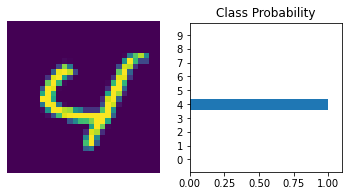

In [21]:
images, labels = next(iter(trainloader))

img = images.resize_(images.shape[0],1, 28,28)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = modell.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
ps[0,:].shape
img[0].view(1, 28, 28).shape

view_classify(img[0].view(1, 28, 28), ps[0])

In [33]:
def mnist(img):
    img1 = img.copy()
    #_, img = cv2.threshold(img, 150, 255, cv2.THRESH_TRUNC)
    img1 = cv2.bitwise_not(img1)
    
    kernel = np.ones((7,7), np.uint8)
    img1  = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
    img1  = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
    img1 = cv2.dilate(img1, kernel) # two thicken the hand writing
    #closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel,)
    #_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    
    #img = cv2.GaussianBlur(img, (5,5),0) # no need it i guess
    closing = cv2.morphologyEx(img1,cv2.MORPH_CLOSE,kernel,)
    resized = cv2.resize(closing, (28, 28), interpolation = cv2.INTER_AREA) # the size of mnist is 28x28
    
    return resized

In [34]:
three_mnist= mnist(three)

In [26]:
def to_tensor(arr: np.ndarray):
    tens = torch.from_numpy(arr).float()
    tensorr = F.normalize(tens)
    tensorr = tensorr.reshape(1,28*28)
    # images.resize_(images.shape[0],1, 28,28)
   
    return tensorr

In [35]:
three_mnist = to_tensor(three_mnist)

In [36]:
y = three_mnist.resize_(three_mnist.shape[0],1, 28,28)

ps = F.softmax(modell.forward(y),dim=1)
ps[0,:].shape

torch.Size([10])

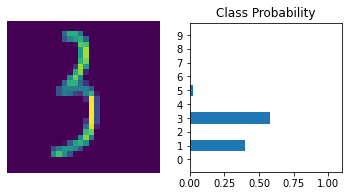

In [37]:
view_classify(y[0].view(1, 28, 28), ps[0])


In [38]:
torch.argmax(ps).item()

3

In [ ]:
#Nice Try Body!